# Geospatial Visualization
#### Author: Naomi Moraes
#### Link: https://github.com/nmoraescommit/eds220-hw4/tree/main

## About
- Purpose: The purpose of this notebook is to explore, clean, and analyze the Landsat data, and observe comparativities with the Thomas Fire perimeter data created in "hwk4-task2-fire-perimeter-MORAES". 
- Highlights: Working with this dataset was interesting in working with satellite data surface reflectance and surface temperature data, being able to start understanding/scratching at the surface of independantly working with xarray dataset dat, and working with the different variables within this dataset to plot out maps. An important part of this coding process was making sure the crs of various geospatial data matched as well as being able to select variables for the dataset to plot out different kinds of maps.
- About the data: The data was retrieved from the Microsof Planetary Computer data catalogue and pre-processed to remove data outside land and coarsen the spatial resolution. It is imported as a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite.
- References: 
    - Thomas Fire Perimeter: Publisher CAL FIRE. (2024, May 14). State of California - california fire perimeters (all). Catalog. https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436 
    - Assignment Reference and Cleaned Landsat Data Access : Galaz-Garcia, C. (n.d.). Assignment 4. assignment4 – EDS 220 - Working with Environmental Datasets. https://meds-eds-220.github.io/MEDS-eds-220-course/assignments/assignment4.html 
    - Landsat Data: Microsoft Planetary Computer. Planetary Computer. (2018, January 12). https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2 

## Set-Up

In this section we will import the appropriate libraries and data to complete this workbook.

### Import Libraries

In [1]:
# Import relevant libraries
import os
import geopandas as gpd
import rioxarray as rioxr
import xarray as xr
import matplotlib.pyplot as plt

### Import Data

In [2]:
# Set up file paths
land_fp = os.path.join('data', 'landsat8-2018-01-26-sb-simplified.nc')
thomas_fp = os.path.join('data', 'thomas_fire_boundary.geojson')

# Import landsat data
landsat = rioxr.open_rasterio(land_fp)

# Import Thomas Fire perimeter
thomas_fire_perimeter = gpd.read_file(thomas_fp)

## Explore Data

In this section we will take a preliminary look at the imported landsat data - in order to understand how to visualize it with respect to the Thomas Fire perimenter data.

In [3]:
# View landsat
landsat

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [4]:
# View landsat shape
landsat.to_array().shape

(5, 1, 731, 870)

In [5]:
# View landsat sizes
landsat.sizes

Frozen({'y': 731, 'x': 870, 'band': 1})

In [6]:
# View landsat coordinates
landsat.coords

Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0

In [7]:
# View landsat dimensions
landsat.dims

Frozen({'y': 731, 'x': 870, 'band': 1})

In [8]:
# View landsat variables
landsat.variables

Frozen({'y': <xarray.IndexVariable 'y' (y: 731)>
array([3952395., 3952125., 3951855., ..., 3755835., 3755565., 3755295.])
Attributes:
    axis:           Y
    crs:            EPSG:32611
    long_name:      y coordinate of projection
    resolution:     -30
    standard_name:  projection_y_coordinate
    units:          metre
    _FillValue:     nan, 'x': <xarray.IndexVariable 'x' (x: 870)>
array([121305., 121575., 121845., ..., 355395., 355665., 355935.])
Attributes:
    axis:           X
    crs:            EPSG:32611
    long_name:      x coordinate of projection
    resolution:     30
    standard_name:  projection_x_coordinate
    units:          metre
    _FillValue:     nan, 'band': <xarray.IndexVariable 'band' (band: 1)>
array([1]), 'spatial_ref': <xarray.Variable ()>
array(0)
Attributes:
    crs_wkt:                           PROJCS["WGS 84 / UTM zone 11N",GEOGCS[...
    semi_major_axis:                   6378137.0
    semi_minor_axis:                   6356752.314245179
    i

In [9]:
# Landsat CRS
landsat.rio.crs

CRS.from_epsg(32611)

### Data Exploration Analysis

Through the exploration of the "landsat" xarray.Dataset, I have been able to notice the shape (5, 1, 731, 870) and the dimensions (x coordinates, y coordinates and 1 band). The data's variables has 5 groups of information - red, green, blue, near infrared 08, and short wave infrared 22. The crs of the dataset is ESPG: 32611.

## Clean Data

In this section, we will remove the band dimension of the Landsat data (as there is only 1).

In [10]:
# Drop the band dimension of the data
landsat = landsat.squeeze()

In [11]:
# Remove coordinates associated to band dimension
landsat = landsat.drop_vars('band')

In [12]:
# Check new landsat dataset
print(landsat.dims, landsat.coords)

Frozen({'y': 731, 'x': 870}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0


In [13]:
# Landsat CRS
landsat.rio.crs

CRS.from_epsg(32611)

## Visualize Data

In this section, I will make some preliminary visuals of the landsat data. I will be making true and false color images.

### True Color Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


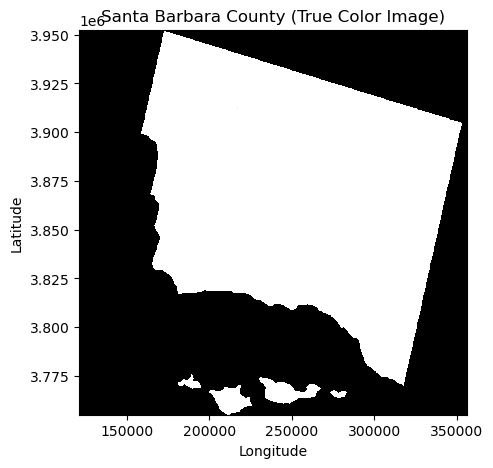

In [14]:
# Select the red, green, and blue variables (in that order) of the xarray.Dataset to create and RGB image
fig, ax = plt.subplots(figsize = (5, 5)) # Set up plot

(landsat[['red', 'green', 'blue']]).to_array().plot.imshow() # Plot 'Landsat'
ax.set_title("Santa Barbara County (True Color Image)")  # Add title

# Set axis labels
ax.set_xlabel("Longitude") 
ax.set_ylabel("Latitude")

# Show map
plt.show()

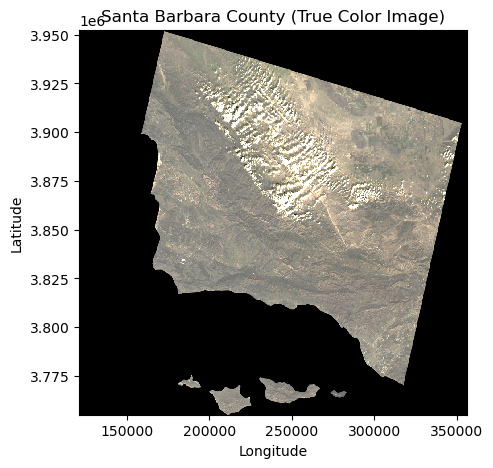

In [15]:
# Adjust the scale for plotting the bands for a true color image
fig, ax = plt.subplots(figsize = (5, 5)) # Set up plot

(landsat[['red', 'green', 'blue']]).to_array().plot.imshow(robust = True) # Plot Landsat True Color image

ax.set_title("Santa Barbara County (True Color Image)")  # Add title

# Set axis labels
ax.set_xlabel("Longitude") 
ax.set_ylabel("Latitude")

# Show map
plt.show()

The outputs for part d) and e) are visually similiar in shape but different in colour representation. This is because clouds cause the RGB values (outliers) cause the other RGB values to be impacted - such that we arrive at a functionally black and white map in part d and a true colour map in part e.

### False Color Image

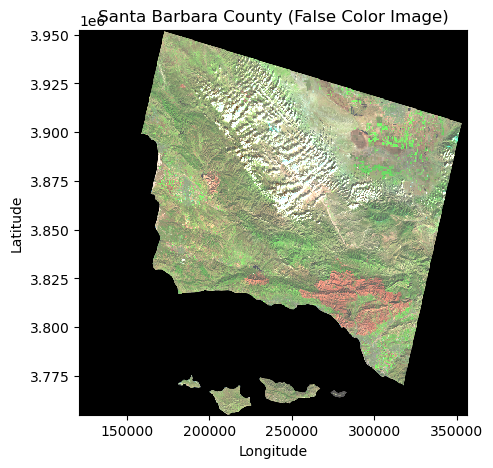

In [16]:
# Plot false color image
fig, ax = plt.subplots(figsize = (5, 5)) # Set up plot

(landsat[['swir22', 'nir08', 'red']]).to_array().plot.imshow(robust = True) # Plot landsat false color image

# Add title
ax.set_title("Santa Barbara County (False Color Image)") 

# Set axis labels
ax.set_xlabel("Longitude") 
ax.set_ylabel("Latitude")

# Show map
plt.show()

Notice how, in the false color image, the area approximating the Thomas Fires are a orange-red color compared to the rest of the green in the county.

### Maps

In this final section, we will create maps of Santa Barbara overlayed with the Thomas Fire perimeter data (that we obtained in the fire perimeter notebook).

In [17]:
# Set CRS of landsat and thomas_fire_perimeter equivalent
thomas_fire_perimeter = thomas_fire_perimeter.to_crs(crs = landsat.rio.crs)

# Test if equivalencies true
assert thomas_fire_perimeter.crs == landsat.rio.crs

### Unclipped Map

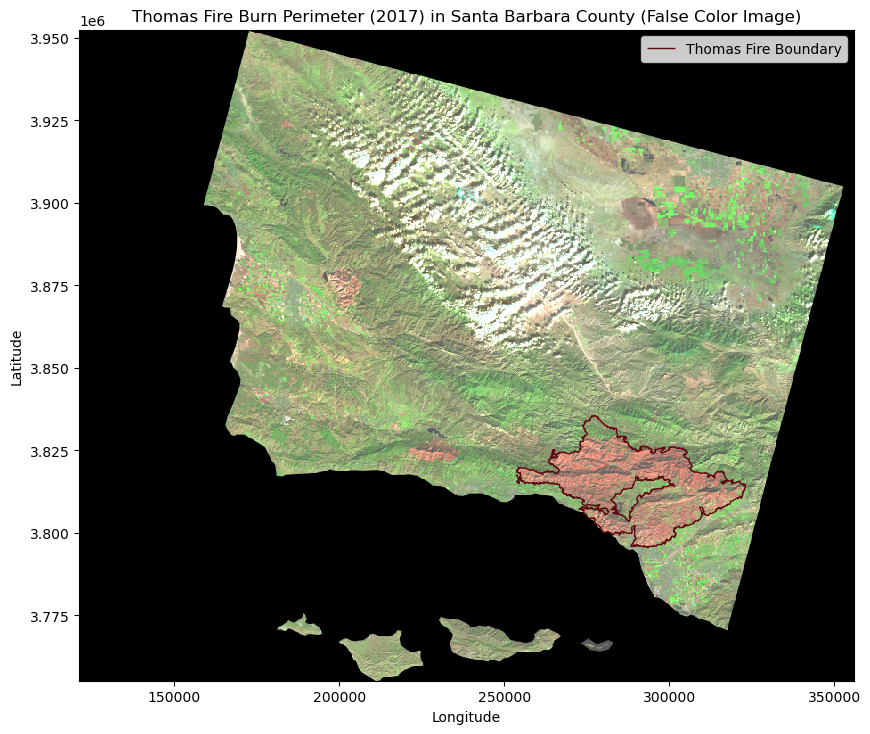

In [21]:
# Create map of false color map with Thomas Fire perimeter
fig, ax = plt.subplots(figsize = (10, 10)) # Set up plot

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True) # Plot landsat false color image
thomas_fire_perimeter.boundary.plot(ax = ax, edgecolor = '#5F0A11' , linewidth = 1, label="Thomas Fire Boundary") # Plot Thomas Fire perimeter

# Add title
ax.set_title("Thomas Fire Burn Perimeter (2017) in Santa Barbara County (False Color Image)")  

# Set legend within map borders
ax.legend()

# Set axis labels
ax.set_xlabel("Longitude") 
ax.set_ylabel("Latitude")

# Set legend
ax.legend()

# Show map
plt.show()

### Clipped Map

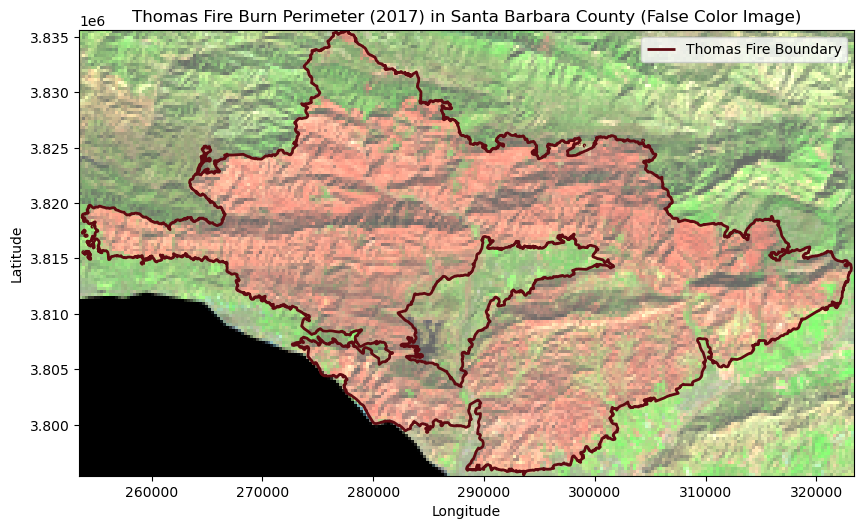

In [22]:
# Create bounding box for fire perimeters
landsat_bounded = landsat.rio.clip_box(*thomas_fire_perimeter.total_bounds)

# Clip map to fire perimeter bounds
fig, ax = plt.subplots(figsize = (10, 10)) # Setup plot
landsat_bounded[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, robust = True) # Plot the landsat bands

thomas_fire_perimeter.boundary.plot(ax = ax, edgecolor = '#5F0A11', linewidth = 2, label="Thomas Fire Boundary") # Plot the thomas fire data on same plot

# Add title
ax.set_title("Thomas Fire Burn Perimeter (2017) in Santa Barbara County (False Color Image)")  

# Set legend within map borders
ax.legend()

# Set axis labels
ax.set_xlabel("Longitude") 
ax.set_ylabel("Latitude")

# Set legend
ax.legend()

# Show map
plt.show()

#### Map Description

The 2 maps in the "Map" portion of this notebook, shows Santa Barbara County with fase color imagery - which include short wave infrared, near infrared, and red bands. The 2017 Thomas Fire burn perimeter is outlined in dark red, on top of this false image map, and it also appears red inside the perimeter (because of the false color imaging). This is due to the fact that it highly reflects shortwave infared. The Thomas Fire started 12/4/2017 and was contained on 1/12/2018. This imagery is therefore taken shortly after the fire was contained, on 1/26/2018.

Data accessed:
- Thomas Fire Perimeter: Publisher CAL FIRE. (2024, May 14). State of California - california fire perimeters (all). Catalog. https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436 
- Landsat Data: Microsoft Planetary Computer. Planetary Computer. (2018, January 12). https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2 